# OpenCV Project: Vehicle Number Plate Detection and Capturing from image

### For saving Number Plate Press 's'. The display will disappear automatically after 2 seconds of pressing 's'.

#### Please input "Image_Source_path" and "Plate_Saving_path" according to your file location. 
#### in case of Plate_Saving_path don't change "{}_plate.jpg" as there is .format() method in the file saving portion.
#### if change, just remove ".format()" from the "cv2.imwrite()" function in "while" loop.

In [1]:
import cv2

minArea = 3000

Image_Source_path = r"D:\Academia\Fahad's Projects\OpenCV\Number plates\car4.jpg"
Plate_Saving_path = r"D:\Academia\Fahad's Projects\OpenCV\Number plates\{}_plate.jpg"

plateName = Image_Source_path.split('\\')[-1].split('.')[0] 

nPlateCascade = cv2.CascadeClassifier(r'D:\Downloads\HaarCascade classifier files\haarcascade_russian_plate_number.xml')

img = cv2.imread(Image_Source_path)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plates = nPlateCascade.detectMultiScale(imgGray, 1.3, 5)

for x,y,w,h in plates:
    area = w*h
    if area > minArea: 
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
        cv2.putText(img, 'Plate Detected', (x,y-10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,255,0), 2)
        imgCrop = img[y:y+h, x:x+w]
        
cv2.imshow('Image', img)
cv2.imshow('Plate', imgCrop)

while True:
    if cv2.waitKey(1) & 0xFF == ord('s'):
        cv2.imwrite(Plate_Saving_path.format(plateName), imgCrop)
        cv2.rectangle(img, (0,130),(img.shape[1],165), (255,255,0), cv2.FILLED)
        cv2.putText(img, 'Plate Saved', ((int(img.shape[1]/2) - 65) ,155), cv2.FONT_ITALIC, 0.7, (0,0,0), 2)
        cv2.imshow('Image', img)
        cv2.waitKey(2000)
        cv2.destroyAllWindows()
        break

### The output is like this

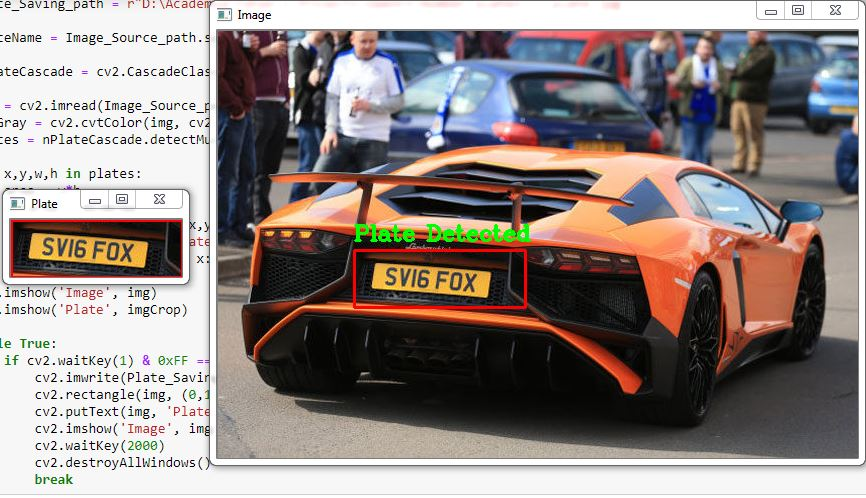